In [4]:
from typing import Any
from networkx import Graph

import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()
G.add_nodes_from(["A", "B", "C", "D", "E", "F", "G", "I"])
G.add_edges_from(
    [
        ("A", "C", {"weight": 10}),
        ("A", "I", {"weight": 5}),
        ("C", "B", {"weight": 20}),
        ("C", "E", {"weight": 15}),
        ("C", "D", {"weight": 30}),
        ("B", "E", {"weight": 25}),
        ("I", "E", {"weight": 40}),
        ("E", "F", {"weight": 35}),
        ("F", "G", {"weight": 50}),
        ("G", "E", {"weight": 45}),
    ]
)

edge_labels = {(a, b): c["weight"] for a, b, c in G.edges(data=True)}
pos = nx.planar_layout(G)

draw_params = {
    "with_labels": True,
    "edge_color": "black",
    "width": 3,
    "linewidths": 3,
    "edgecolors": "black",
    "node_color": "white",
    "node_size": 1000,
    "font_color": "black",
    "font_family": "monospace",
    "font_weight": "bold",
}


def draw_compared_graph(graph: Graph, c_edge_labels: dict[tuple, Any], title=""):
    _, axes = plt.subplots(1, 2, figsize=(20, 10))

    nx.draw(G, pos, ax=axes[0], **draw_params)
    nx.draw_networkx_edge_labels(G, pos, edge_labels, ax=axes[0], label_pos=0.5)
    axes[0].set_title("Original Graph")

    nx.draw(graph, pos, ax=axes[1], **draw_params)
    nx.draw_networkx_edge_labels(
        graph, pos, edge_labels=c_edge_labels, ax=axes[1], label_pos=0.5
    )
    axes[1].set_title(title)

    plt.tight_layout()
    plt.show()

Name: Ramas, Ron Patrick G. - 23102078 \
Discrete Math - CIS 1203 \
Group 2 - TTH 12:00 - 1:30 PM

# **Assignment in Discrete Mathematics 2**

---

## **Lecture 4**

### **1. Kruskal's Algorithm**

In [5]:
def kruskal_mst(graph: Graph):
    mst = nx.Graph()
    mst.add_nodes_from(graph.nodes)
    edges = sorted(graph.edges(data=True), key=lambda x: x[2]["weight"])

    for edge in edges:
        if not nx.has_path(mst, edge[0], edge[1]):
            mst.add_edge(edge[0], edge[1], weight=edge[2]["weight"])

    return mst, {(a, b): c["weight"] for a, b, c in mst.edges(data=True)}

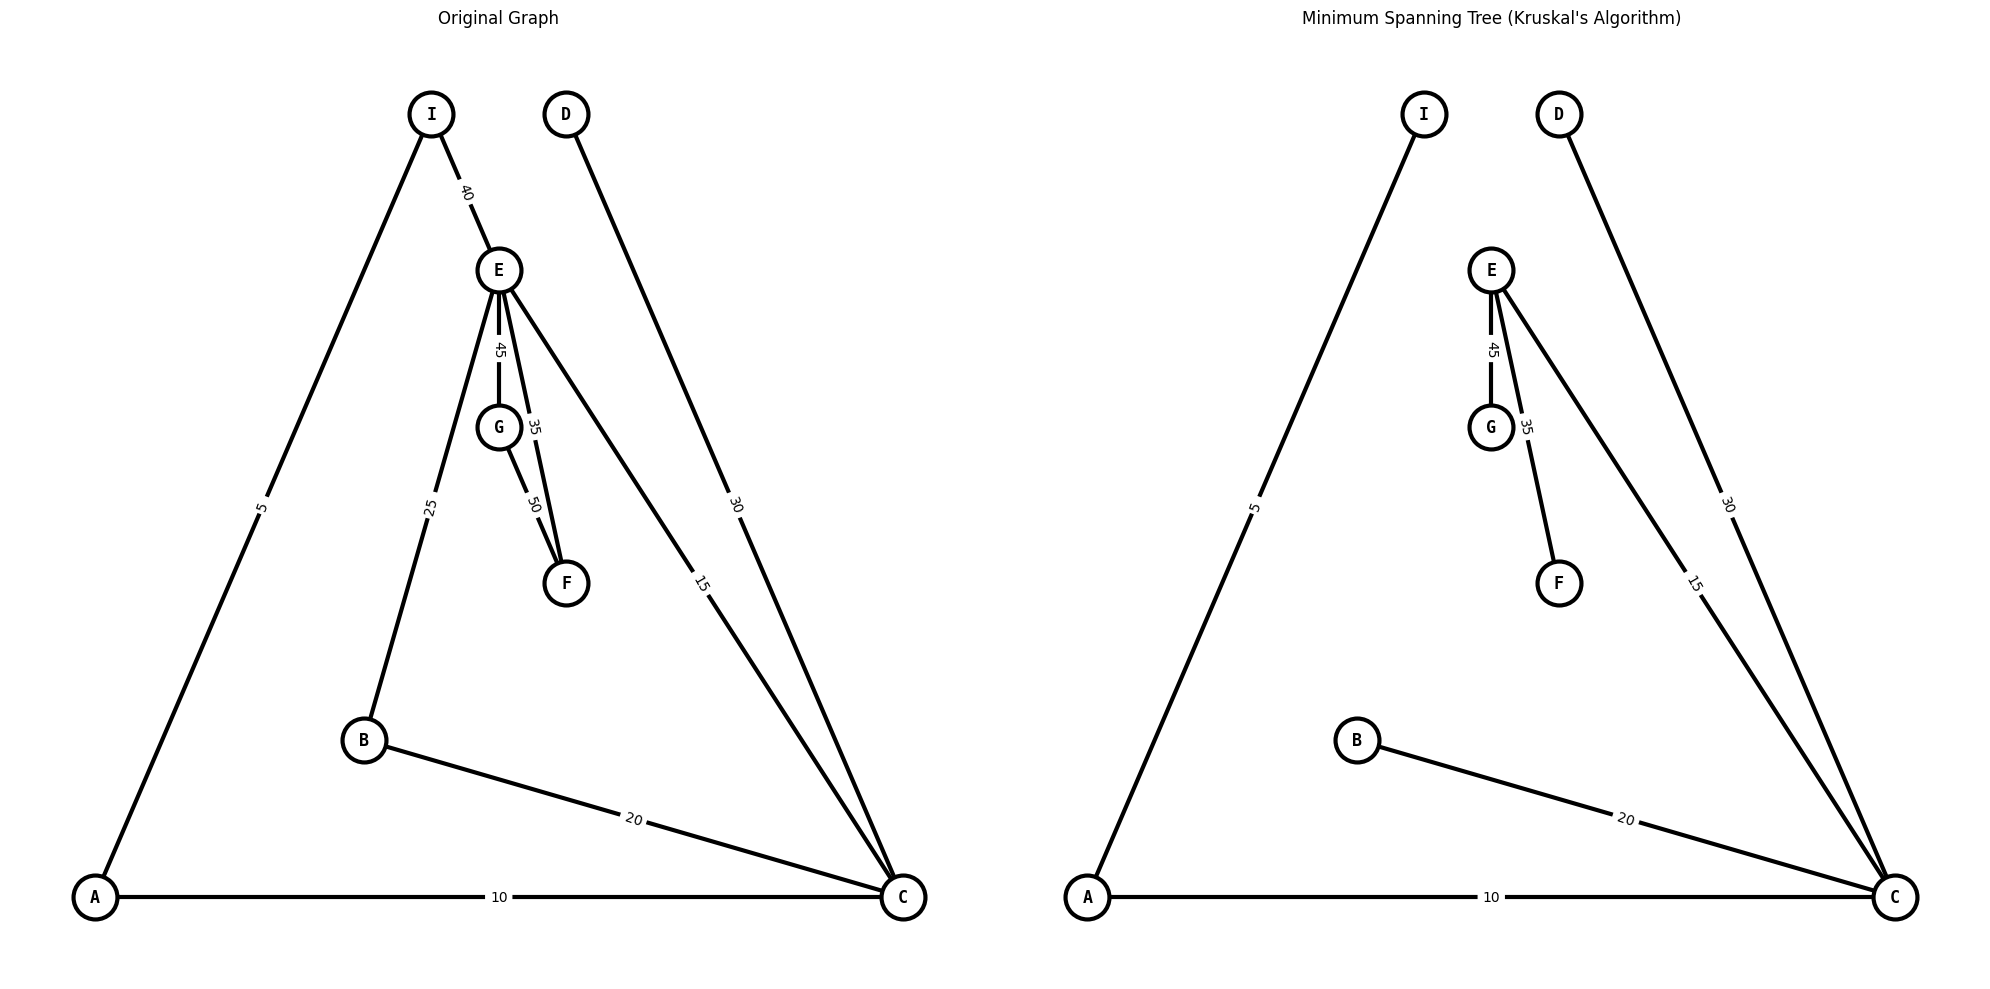

In [6]:
kruskal, kruskal_edge_labels = kruskal_mst(G)
draw_compared_graph(
    kruskal, kruskal_edge_labels, "Minimum Spanning Tree (Kruskal's Algorithm)"
)

### **2. Prim's Algorithm**

---

In [7]:
def prim_mst(graph: Graph):
    mst = nx.Graph()
    mst.add_node(list(graph.nodes)[0])

    size = len(graph.nodes)

    while len(mst.nodes) < size:
        min_edge = None
        min_weight = float("inf")

        for node in mst.nodes:
            for neighbor, data in graph.adj[node].items():
                if neighbor not in mst.nodes and data["weight"] < min_weight:
                    min_edge = (node, neighbor)
                    min_weight = data["weight"]

        if min_edge:
            mst.add_edge(*min_edge, weight=min_weight)

    return mst, {(a, b): c["weight"] for a, b, c in mst.edges(data=True)}

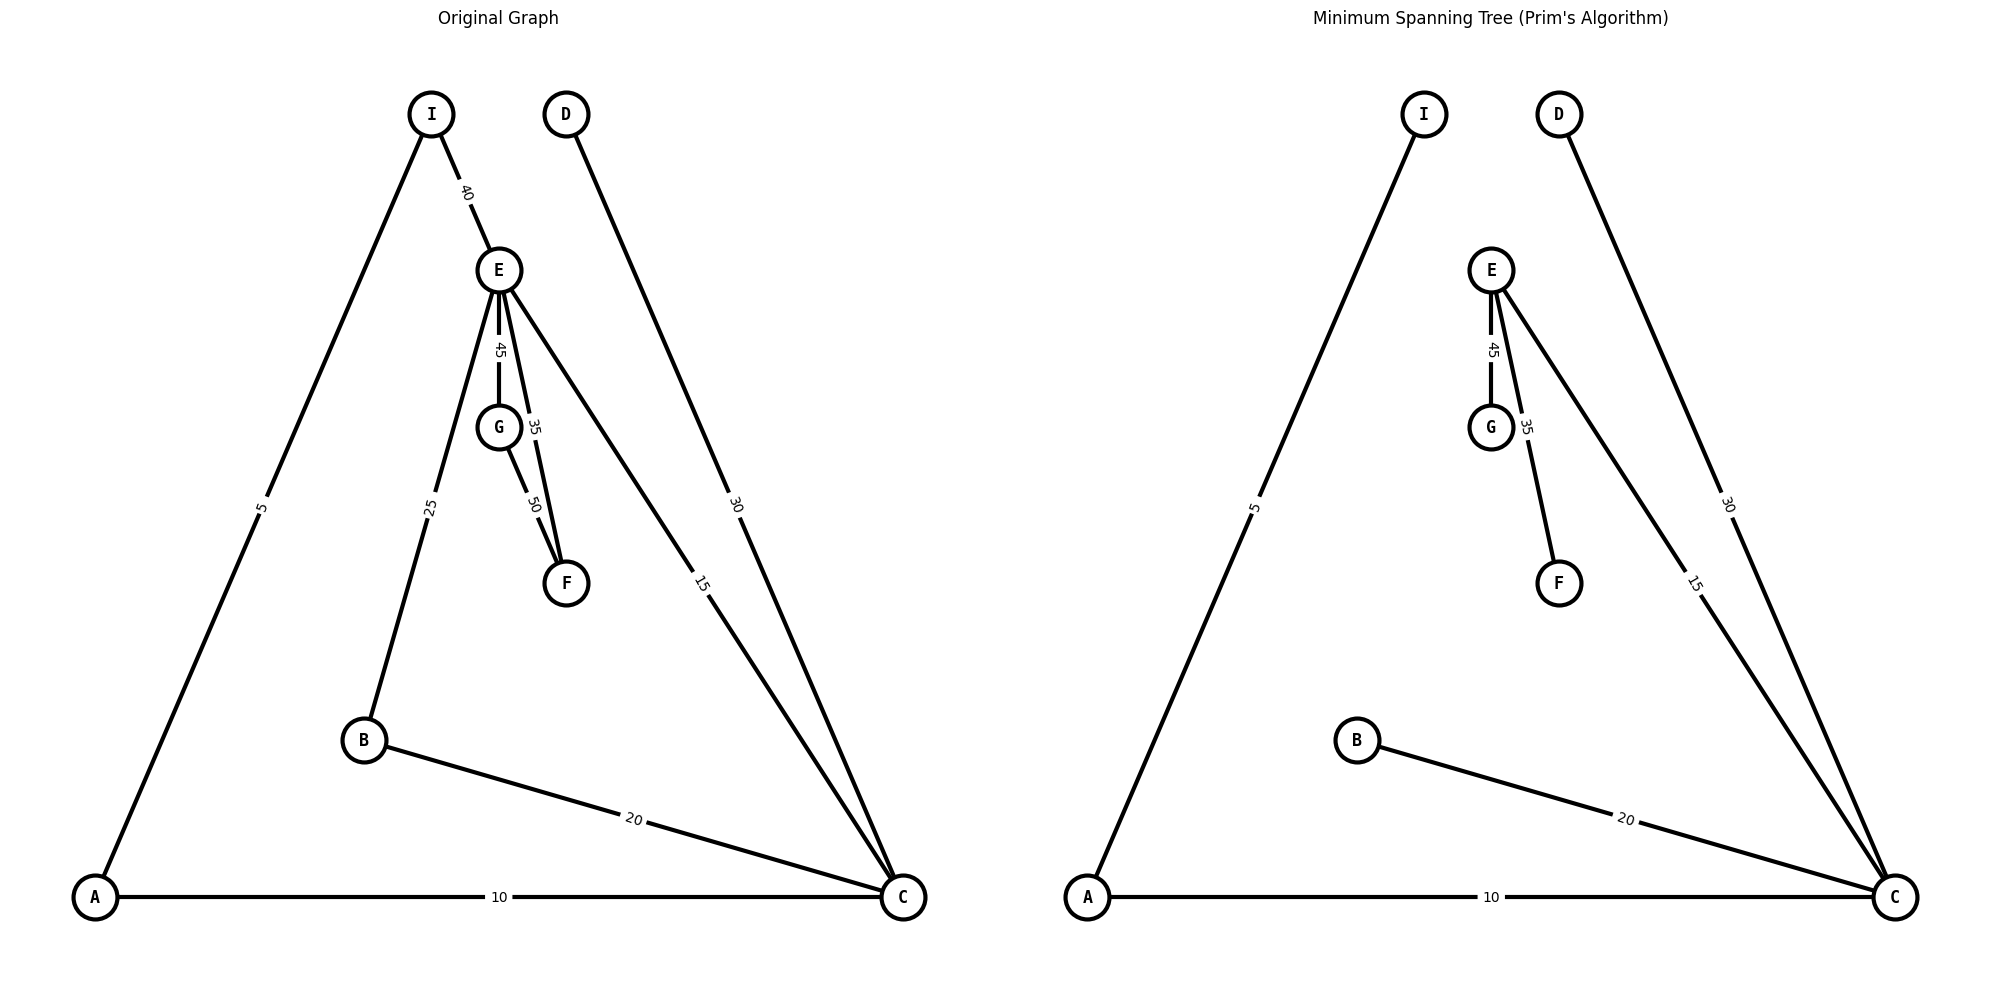

In [8]:
prim, prim_edge_labels = prim_mst(G)
draw_compared_graph(prim, prim_edge_labels, "Minimum Spanning Tree (Prim's Algorithm)")

### **3. Dijkstra's Shortest Path Algorithm**

---

In [14]:
def dijkstra_mst(graph: Graph, source: str):
    import heapq

    previous = {node: None for node in graph.nodes}
    visited = {node: False for node in graph.nodes}

    distances = {node: float("inf") for node in graph.nodes}
    distances[source] = 0

    queue = [(0, source)]

    while queue:
        current_distance, current_node = heapq.heappop(queue)
        visited[current_node] = True

        if current_distance > distances[current_node]:
            continue

        for neighbor, data in graph.adj[current_node].items():
            if visited[neighbor]:
                continue

            new_distance = current_distance + data["weight"]

            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                previous[neighbor] = current_node
                heapq.heappush(queue, (new_distance, neighbor))

    dijstra = nx.Graph()
    dijstra.add_nodes_from(graph.nodes)
    dijstra.add_edges_from(
        [
            (prev, node, {"weight": graph.edges[(prev, node)]["weight"]})
            for prev, node in previous.items()
            if node is not None
        ]
    )

    return dijstra, {(a, b): c["weight"] for a, b, c in dijstra.edges(data=True)}


def dijkstra_path(graph: Graph, source: str, target: str):
    distances = {node: float("inf") for node in graph.nodes}
    distances[source] = 0

    previous = {node: None for node in graph.nodes}
    visited = set()

    while visited != set(graph.nodes):
        current_node = min(
            (node for node in graph.nodes if node not in visited),
            key=lambda x: distances[x],
        )
        visited.add(current_node)

        if current_node == target:
            break

        for neighbor, data in graph.adj[current_node].items():
            new_distance = distances[current_node] + data["weight"]
            if new_distance < distances[neighbor]:
                distances[neighbor] = new_distance
                previous[neighbor] = current_node

    shortest_path = []
    current_node = target

    while current_node is not None:
        shortest_path.append(current_node)
        current_node = previous[current_node]

    shortest_path.reverse()

    dijstra = nx.Graph()
    dijstra.add_nodes_from(shortest_path)
    dijstra.add_edges_from(
        [
            (
                shortest_path[i],
                shortest_path[i + 1],
                {
                    "weight": graph.edges[(shortest_path[i], shortest_path[i + 1])][
                        "weight"
                    ]
                },
            )
            for i in range(len(shortest_path) - 1)
        ]
    )

    return dijstra, {(a, b): c["weight"] for a, b, c in dijstra.edges(data=True)}

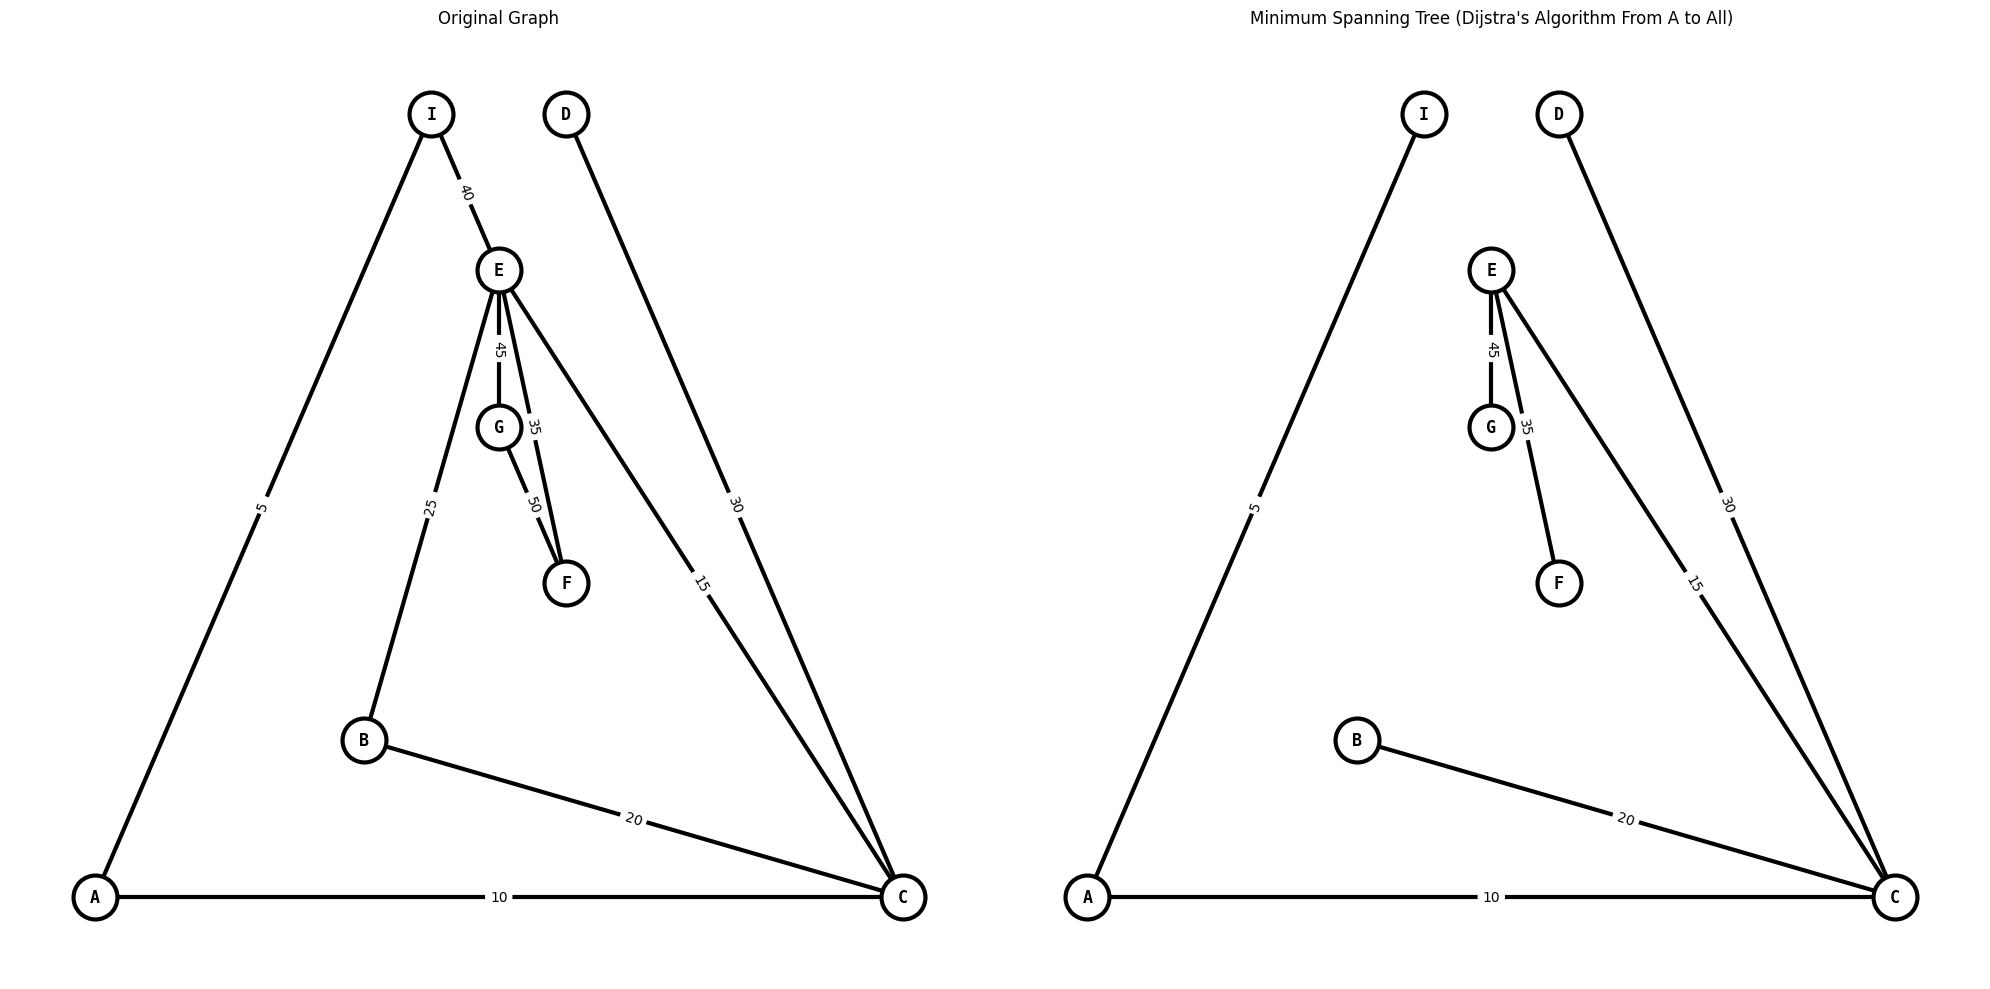

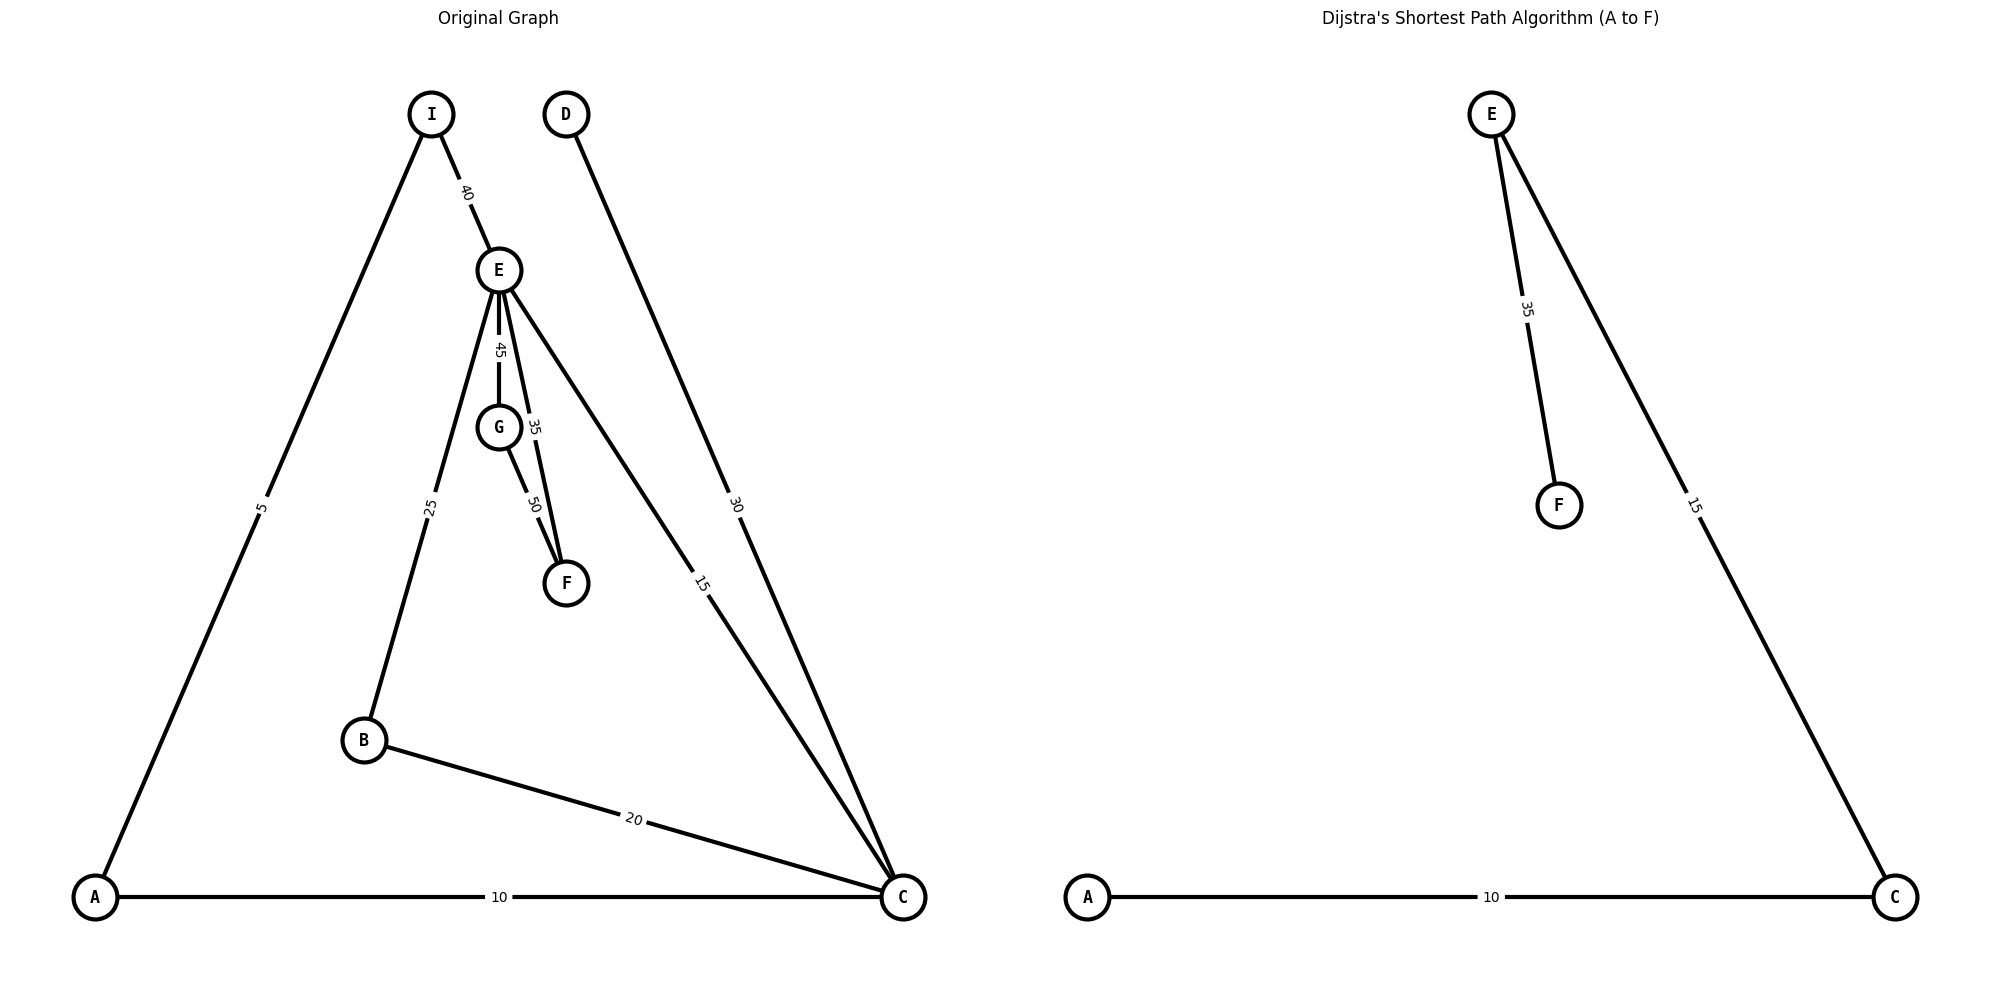

In [17]:
dijstra, dijstra_edge_labels = dijkstra_mst(G, source="A")
draw_compared_graph(
    dijstra,
    dijstra_edge_labels,
    "Minimum Spanning Tree (Dijstra's Algorithm From A to All)",
)

dijstra, dijstra_edge_labels = dijkstra_path(G, source="A", target="F")
draw_compared_graph(
    dijstra, dijstra_edge_labels, "Dijstra's Shortest Path Algorithm (A to F)"
)